# Exercise 12
Perform an image classification using CNN. you may use Keras or Pytorch to implement the same.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 506s 2s/step - accuracy: 0.5123 - loss: 0.7977 - val_accuracy: 0.5710 - val_loss: 0.6805
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 488s 2s/step - accuracy: 0.5754 - loss: 0.6805 - val_accuracy: 0.6635 - val_loss: 0.6416
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 507s 2s/step - accuracy: 0.6303 - loss: 0.6479 - val_accuracy: 0.6905 - val_loss: 0.5873
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 493s 2s/step - accuracy: 0.6882 - loss: 0.5962 - val_accuracy: 0.6995 - val_loss: 0.5721
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 509s 2s/step - accuracy: 0.6858 - loss: 0.5787 - val_accuracy: 0.7545 - val_loss: 0.5152
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 499s 2s/step - accuracy: 0.7286 - loss: 0.5300 - val_accuracy: 0.7540 - val_loss: 0.4909
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 486s 2s/step - accuracy: 0.7545 - loss: 0.4986 - val_accuracy: 0.7345 - val_loss: 0.5231
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 487s 2s/step - accuracy: 0.7722 - loss: 0.4848 - val_accu

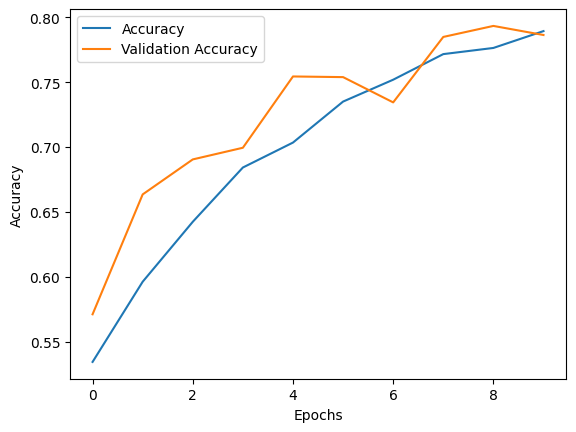

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
cat_or_dog_1.jpg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
cat_or_dog_2.jpg: Cat


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import imghdr
from io import BytesIO
from google.colab import drive
import zipfile

drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/dataset.zip'
extract_path = '/content/dataset'

with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

train_dir = os.path.join(extract_path, 'training_set')
test_dir = os.path.join(extract_path, 'test_set')
predict_dir = os.path.join(extract_path, 'single_prediction')

IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255, featurewise_center=True, featurewise_std_normalization=True, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255, featurewise_center=True, featurewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')

def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
history = model.fit(train_generator, validation_data=test_generator, epochs=10)

model.save('cat_dog_classifier.h5')

def plot_training(history):
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_training(history)

def predict_image(img_path, model):
    if not os.path.exists(img_path) or imghdr.what(img_path) is None:
        print(f"Skipping invalid file: {img_path}")
        return "Invalid File"

    try:
        with open(img_path, "rb") as f:
            img = Image.open(BytesIO(f.read())).convert("RGB")
        img = img.resize(IMG_SIZE)
        img_array = np.array(img) / 255.0
        img_array = (img_array - np.mean(img_array)) / np.std(img_array)  # Normalize image
        img_array = np.expand_dims(img_array, axis=0)
        prediction = model.predict(img_array)
        return 'Dog' if prediction[0][0] > 0.5 else 'Cat'
    except Exception as e:
        print(f"Error processing image {img_path}: {e}")
        return "Error"

for img_file in os.listdir(predict_dir):
    img_path = os.path.join(predict_dir, img_file)
    print(f"{img_file}: {predict_image(img_path, model)}")


### Achieved an accuracy of 79.22% and accurately predicted the images in the single_prediction directory.